# Create a heat map for emotions x hr

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir("C:\\Users\\joann\\Downloads\\JupyterNotebook\\R Notebooks\\FrightNight")

In [2]:
df=pd.read_csv("hrEmo.csv")
print(df.head(10))

    PID  FearRatingAudio  ExpFearConvert  UniqueEvent  AvgHR  HRzScore  \
0  1310              2.0             2.5            1  80.59  0.116322   
1  1310              2.0             2.5            1  80.59  0.116322   
2  1310              2.0             2.5            1  80.59  0.116322   
3  1310              NaN             NaN            2  72.06 -0.944132   
4  1310              NaN             NaN            2  72.06 -0.944132   
5  1310              NaN             NaN            2  72.06 -0.944132   
6  1310              2.0             2.5            3  81.13  0.183455   
7  1310              2.0             2.5            3  81.13  0.183455   
8  1310              2.0             2.5            3  81.13  0.183455   
9  1310              3.0             4.0            4  93.27  1.692706   

                                         Description           Emotions  \
0  all of us (participants) holding a rope as we ...  Amused/Interested   
1  all of us (participants) holding

In [3]:
os.chdir("C:\\USers\\joann\\Downloads\\FrightNight\\Manuscript\\Revisions")
data = pd.read_csv("heatmapData.csv")
data

,Index,Emotions,EmotionExtent,HRzScore
0,1,Fearful/Afraid*,1,0.219
1,2,Alert/Attentive,2,-0.072
2,3,Amused/Interested,2,0.057
3,4,Fearful/Afraid,2,0.535
4,5,Fearful/Afraid*,2,0.509
...,...,...,...,...
66,80,Overwhelmed,7,0.765
67,81,Panicked,7,0.675
68,82,Shocked/Surprised,7,0.464
69,83,Tense,7,0.758


In [4]:
data1=pd.pivot_table(data, values = "HRzScore",index=["Emotions"], columns=["EmotionExtent"], aggfunc='mean')
data1
# data1.to_csv("pivot.csv")

data2=pd.pivot_table(data, values = "HRzScore",columns=["Emotions"], index=["EmotionExtent"], aggfunc='mean')
data2.to_csv("pivot2.csv")

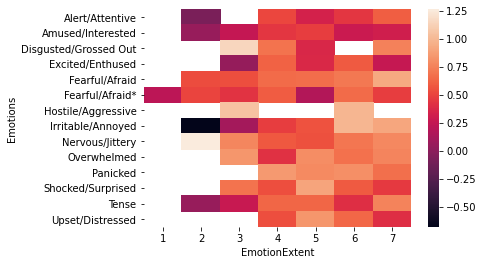

In [5]:
display=sns.heatmap(data1)

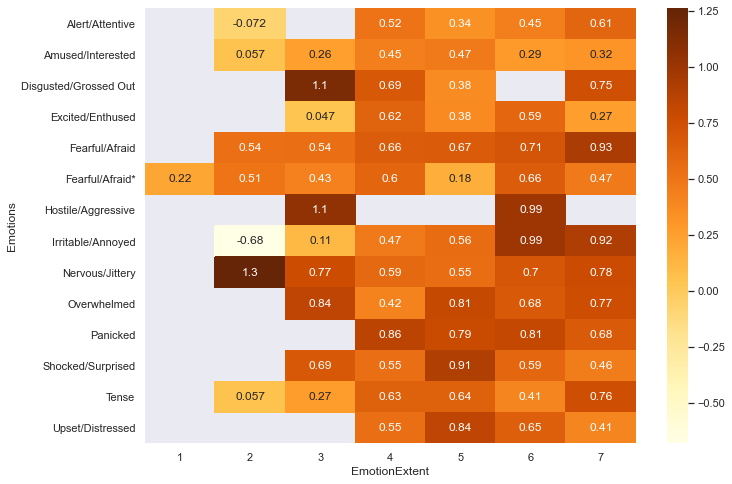

In [6]:
sns.set(rc={'figure.figsize':(11,8)})
display=sns.heatmap(data1, annot=True, cmap="YlOrBr")

Update the heat map to weight the influence of number of observations

### Going to try to make a 3d heatmap with number of observations on the z axis

In [2]:
import numpy as np 
import pandas as pd 
import gmaps 
import gmaps.datasets 

### Get the number of observations

#### first subset our df to limit the variables, then get rid of the observations for the 'other' emotions

In [7]:
df1 = df[["EmotionExtent", "Emotions", "HRzScore"]]
df1

mask = df1['Emotions'].isin(['Other-awkward', 'Other-Dizzy', 'Other-anxious', 'Other-fascinated', 'Other- Disappointed', \
                            'Other-funny/laughing', 'Other-funny' ,'Other-Disoriented', 'Other - at ease', 'Other-Disinterest'\
                            'Other-disoriented', 'Other-confused', 'Other-Confused'])
df1=df1[~mask]
df1

,EmotionExtent,Emotions,HRzScore
0,6,Amused/Interested,0.116322
1,6,Nervous/Jittery,0.116322
2,5,Fearful/Afraid*,0.116322
3,6,Nervous/Jittery,-0.944132
4,7,Shocked/Surprised,-0.944132
...,...,...,...
972,2,Fearful/Afraid*,-0.964284
973,6,Amused/Interested,0.825030
974,1,Fearful/Afraid*,0.825030
975,4,Amused/Interested,0.421509


## Count the number of observations

In [8]:
emoCount= df1[["EmotionExtent", "Emotions"]].value_counts(sort=False).reset_index()
emoCount

,EmotionExtent,Emotions,0
0,1,Fearful/Afraid*,89
1,2,Alert/Attentive,1
2,2,Amused/Interested,3
3,2,Fearful/Afraid,2
4,2,Fearful/Afraid*,31
...,...,...,...
68,7,Overwhelmed,8
69,7,Panicked,10
70,7,Shocked/Surprised,14
71,7,Tense,25


And rename the 0 column to Count - we're saving this as a different dataframe so we can still get mean HR in the original DF

In [9]:
emoCount=emoCount.rename(columns={0: "Count"})
count = emoCount["Count"]

### Now groupby EmotionExtent and Emotions to get mean heart rate

In [11]:
hrMean = df1.groupby(["EmotionExtent", "Emotions"]).mean()
hrAvg=hrMean["HRzScore"]


## Save that series of HR means to a csv, then grab that column...

In [13]:
hrMean.to_csv("hrmean.csv")
hrMean=pd.read_csv("hrmean.csv")
hrAvg = hrMean["HRzScore"]
hrAvg



0     0.218643
1    -0.072067
2     0.056513
3     0.534555
4     0.509238
        ...   
68    0.764697
69    0.675222
70    0.464129
71    0.758167
72    0.406672
Name: HRzScore, Length: 73, dtype: float64

## And append it to our other dataframe

In [14]:
emoCount["hrAvg"] = hrAvg
emoCount
emoCount.to_csv("3dHeatmap.csv")

## Back to making a heatmap

Read back in that same df, then define our variables

In [3]:
os.chdir("C:\\Users\\joann\\Downloads\\JupyterNotebook\\R Notebooks\\FrightNight")
df2 = pd.read_csv("3dHeatmap.csv")
# df2=df2.drop(['Other-disoriented', 'Other-Disinterest', 'Other - at ease'])
df2=df2[df2.Emotions != 'Other-disoriented']
df2=df2[df2.Emotions != 'Other-Disinterest']
df2=df2[df2.Emotions != 'Other - at ease']


## Create two matrices such that we can overlay our heatmaps

In [8]:
data1=pd.pivot_table(df2, values = "hrAvg",index=["Emotions"], columns=["EmotionExtent"], aggfunc='mean')
# data1=data1.drop(['Other-disoriented', 'Other-Disinterest', 'Other - at ease'])
data1
# data1.to_csv("pivotHR.csv")

EmotionExtent,1,2,3,4,5,6,7
Emotions,,,,,,,
Alert/Attentive,NaN,-0.072067,NaN,0.517346,0.343793,0.445870,0.606525
Amused/Interested,NaN,0.056513,0.261199,0.446773,0.474752,0.287038,0.321581
Disgusted/Grossed Out,NaN,NaN,1.149382,0.690022,0.374737,NaN,0.751615
Excited/Enthused,NaN,NaN,0.046738,0.619703,0.381974,0.589368,0.268907
Fearful/Afraid,NaN,0.534555,0.542552,0.660492,0.669050,0.712067,0.932483
Fearful/Afraid*,0.218643,0.509238,0.435473,0.601870,0.177268,0.662961,0.474956
Hostile/Aggressive,NaN,NaN,1.052860,NaN,NaN,0.991965,NaN
Irritable/Annoyed,NaN,-0.677538,0.113862,0.474475,0.558129,0.991356,0.917752
Nervous/Jittery,NaN,1.261567,0.772324,0.585715,0.551870,0.704506,0.780246


In [6]:
data2=pd.pivot_table(df2, values = "Count",index=["Emotions"], columns=["EmotionExtent"])
# data2=data2.drop(['Other-disoriented', 'Other-Disinterest', 'Other - at ease'])
data2.to_csv("pivotCount.csv")
data2

data3 = pd.pivot_table(df2, values = "Count",columns=["Emotions"], index=["EmotionExtent"])


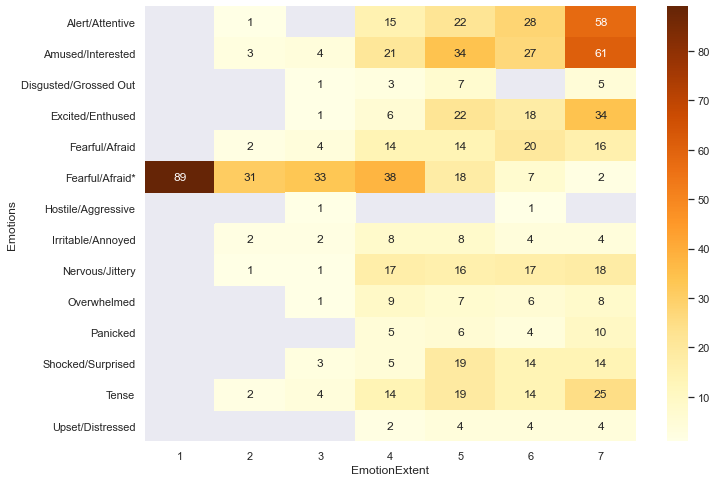

In [18]:
sns.set(rc={'figure.figsize':(11,8)})
display=sns.heatmap(data2, annot=True, cmap="YlOrBr")


## Multiply the HR avg by the number of observations, such that we get weighted values 

In [11]:
df2["Weighted"]=df2["Count"] * df2["hrAvg"] 
df2

,Unnamed: 0,EmotionExtent,Emotions,Count,hrAvg,Weighted
0,0,1,Fearful/Afraid*,89,0.218643,19.459240
1,1,2,Alert/Attentive,1,-0.072067,-0.072067
2,2,2,Amused/Interested,3,0.056513,0.169540
3,3,2,Fearful/Afraid,2,0.534555,1.069110
4,4,2,Fearful/Afraid*,31,0.509238,15.786385
...,...,...,...,...,...,...
69,69,7,Overwhelmed,8,0.764697,6.117576
70,70,7,Panicked,10,0.675222,6.752216
71,71,7,Shocked/Surprised,14,0.464129,6.497805
72,72,7,Tense,25,0.758167,18.954184


In [12]:
data4=pd.pivot_table(df2, values = "Weighted",index=["Emotions"], columns=["EmotionExtent"])
data4

EmotionExtent,1,2,3,4,5,6,7
Emotions,,,,,,,
Alert/Attentive,NaN,-0.072067,NaN,7.760197,7.563444,12.484350,35.178475
Amused/Interested,NaN,0.169540,1.044796,9.382241,16.141573,7.750018,19.616421
Disgusted/Grossed Out,NaN,NaN,1.149382,2.070066,2.623157,NaN,3.758077
Excited/Enthused,NaN,NaN,0.046738,3.718216,8.403421,10.608631,9.142830
Fearful/Afraid,NaN,1.069110,2.170208,9.246886,9.366697,14.241335,14.919724
Fearful/Afraid*,19.45924,15.786385,14.370625,22.871074,3.190829,4.640724,0.949912
Hostile/Aggressive,NaN,NaN,1.052860,NaN,NaN,0.991965,NaN
Irritable/Annoyed,NaN,-1.355075,0.227723,3.795800,4.465031,3.965423,3.671007
Nervous/Jittery,NaN,1.261567,0.772324,9.957150,8.829923,11.976594,14.044430


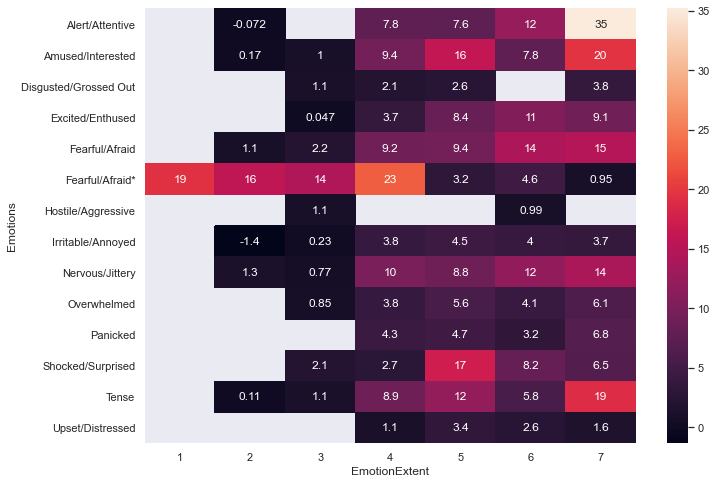

In [14]:
sns.set(rc={'figure.figsize':(11,8)})
display=sns.heatmap(data4, annot=True, cmap="rocket")


In [233]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x=df2["EmotionExtent"]
y=df2["Emotions"]
y2=df2["hrAvg"]
z=df2["Count"]

df2['EmotionsCoded']=pd.Categorical(df2['Emotions'])
df2['EmotionsCoded']=df2['EmotionsCoded'].cat.codes

x1=x.tolist()
y1=y.tolist()
z1=z.tolist()
y2=y2.tolist()

z=z.to_frame()

In [239]:
print("Emotions: ",df2["Emotions"] )
print("Emotions Coded:", df2["EmotionsCoded"])

Emotions:  0       Fearful/Afraid*
1       Alert/Attentive
2     Amused/Interested
3        Fearful/Afraid
4       Fearful/Afraid*
            ...        
69          Overwhelmed
70             Panicked
71    Shocked/Surprised
72                Tense
73     Upset/Distressed
Name: Emotions, Length: 71, dtype: object
Emotions Coded: 0      5
1      0
2      1
3      4
4      5
      ..
69     9
70    10
71    11
72    12
73    13
Name: EmotionsCoded, Length: 71, dtype: int8


<IPython.core.display.Javascript object>


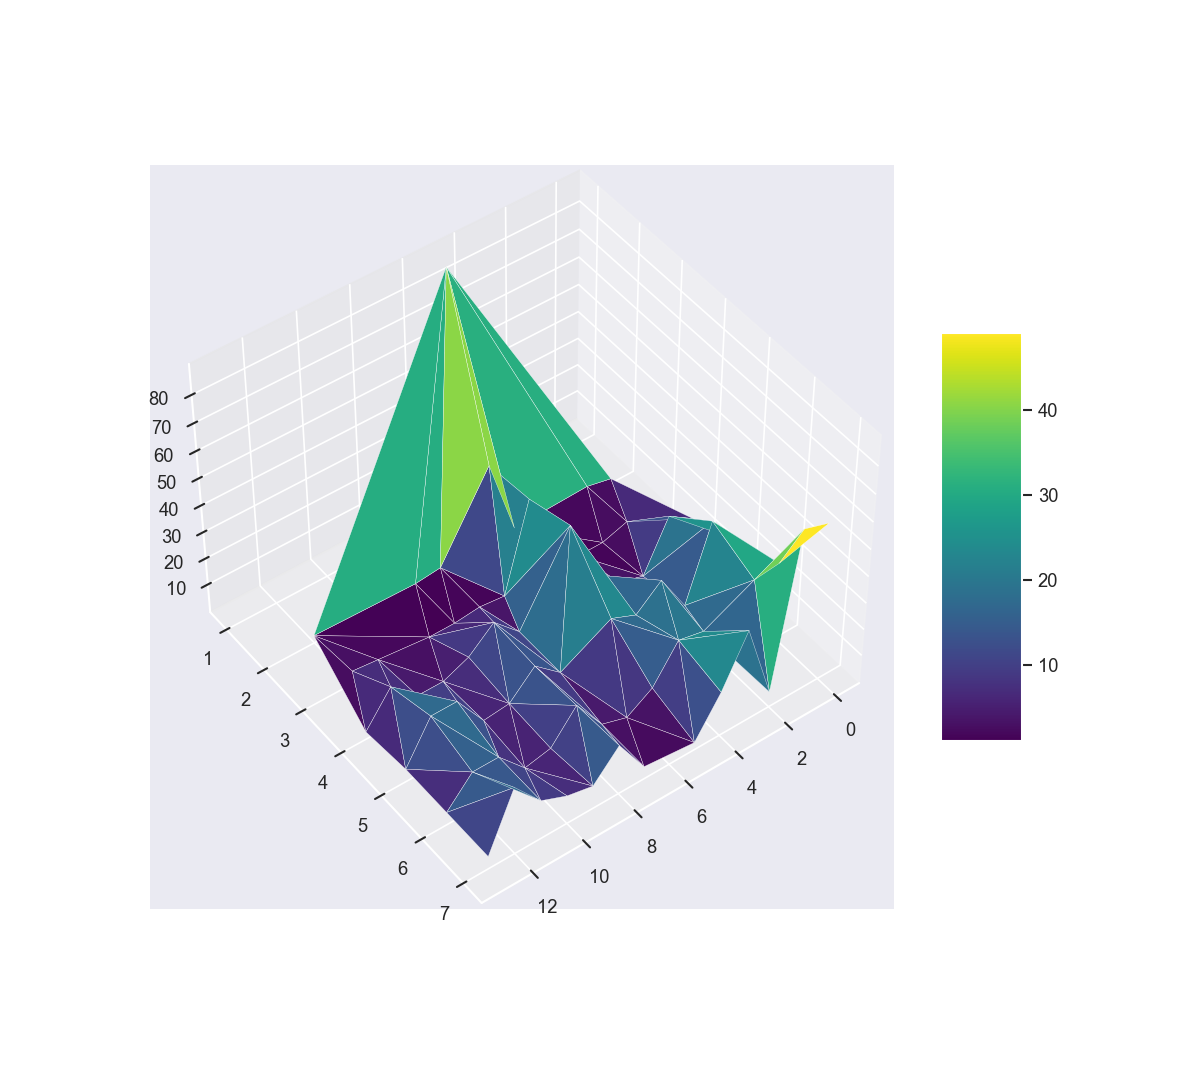

In [231]:
%matplotlib notebook


fig = plt.figure(figsize=(10, 9), dpi=80)
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(df2['EmotionsCoded'], df2['EmotionExtent'], df2['Count'], cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(30, 45)


In [207]:
plt.show()


In [261]:
print(data2[0:5])
type(data2)

EmotionExtent            1    2    3     4     5     6     7
Emotions                                                    
Alert/Attentive        0.0  1.0  0.0  15.0  22.0  28.0  58.0
Amused/Interested      0.0  3.0  4.0  21.0  34.0  27.0  61.0
Disgusted/Grossed Out  0.0  0.0  1.0   3.0   7.0   0.0   5.0
Excited/Enthused       0.0  0.0  1.0   6.0  22.0  18.0  34.0
Fearful/Afraid         0.0  2.0  4.0  14.0  14.0  20.0  16.0


pandas.core.frame.DataFrame

In [250]:
data2 =data2.fillna(0)

In [263]:
data2.to_numpy()

array([[ 0.,  1.,  0., 15., 22., 28., 58.],
       [ 0.,  3.,  4., 21., 34., 27., 61.],
       [ 0.,  0.,  1.,  3.,  7.,  0.,  5.],
       [ 0.,  0.,  1.,  6., 22., 18., 34.],
       [ 0.,  2.,  4., 14., 14., 20., 16.],
       [89., 31., 33., 38., 18.,  7.,  2.],
       [ 0.,  0.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  2.,  2.,  8.,  8.,  4.,  4.],
       [ 0.,  1.,  1., 17., 16., 17., 18.],
       [ 0.,  0.,  1.,  9.,  7.,  6.,  8.],
       [ 0.,  0.,  0.,  5.,  6.,  4., 10.],
       [ 0.,  0.,  3.,  5., 19., 14., 14.],
       [ 0.,  2.,  4., 14., 19., 14., 25.],
       [ 0.,  0.,  0.,  2.,  4.,  4.,  4.]])

In [282]:
# Create figure and add axis
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='3d')

# Remove gray panes and axis grid
ax.xaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.fill = False
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.fill = False
ax.zaxis.pane.set_edgecolor('white')
ax.grid(False)

# Remove z-axis
ax.w_zaxis.line.set_lw(0.)
ax.set_zticks([])


# Create meshgrid
X, Y = np.meshgrid(np.linspace(0, 2, len(data2)), np.linspace(0, 2, len(data2)))

# Plot surface
plot = ax.plot_surface(X=X, Y=Y, Z=data2, cmap='YlGnBu_r')

# Adjust plot view
ax.view_init(elev=50, azim=225)
ax.dist=11

cbar = fig.colorbar(plot, ax=ax, shrink=0.6)
cbar.set_ticks([0, 50, 100, 150, 200])
cbar.set_ticklabels(['0', '50', '100', '150', '200 nm'])

# Set tick marks
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))

# Set axis labels
ax.set_xlabel(r'$\mathregular{\mu}$m', labelpad=20)
ax.set_ylabel(r'$\mathregular{\mu}$m', labelpad=20)

# Set z-limit
ax.set_zlim(50, 200)

# Save and show figure
#plt.savefig('afm_3d_plot.png', dpi=100, bbox_inches='tight')
plt.show()


<IPython.core.display.Javascript object>

C:\Users\joann\anaconda3\envs\PytR-Env\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Z contains NaN values. This may result in rendering artifacts.


ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [279]:
Y

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.15384615, 0.15384615, 0.15384615, 0.15384615, 0.15384615,
        0.15384615, 0.15384615, 0.15384615, 0.15384615, 0.15384615,
        0.15384615, 0.15384615, 0.15384615, 0.15384615],
       [0.30769231, 0.30769231, 0.30769231, 0.30769231, 0.30769231,
        0.30769231, 0.30769231, 0.30769231, 0.30769231, 0.30769231,
        0.30769231, 0.30769231, 0.30769231, 0.30769231],
       [0.46153846, 0.46153846, 0.46153846, 0.46153846, 0.46153846,
        0.46153846, 0.46153846, 0.46153846, 0.46153846, 0.46153846,
        0.46153846, 0.46153846, 0.46153846, 0.46153846],
       [0.61538462, 0.61538462, 0.61538462, 0.61538462, 0.61538462,
        0.61538462, 0.61538462, 0.61538462, 0.61538462, 0.61538462,
        0.61538462, 0.61538462, 0.61538462, 0.61538462],
       [0.76923077, 0.76923077, 0.7